In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the dataset
data = pd.read_csv('/content/B07_General_Election_2019.csv')

In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [ ]:
# Display the first few rows of the dataset
print(data.head())

           STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0   MALE              52  52.0       ST      12th Pass   
1   MALE               0  54.0       ST  Post Graduate   
2   MALE               3  52.0       ST      12th Pass   
3    NaN             NaN   NaN      NaN            NaN   
4   MALE               5  58.0       SC      Doctorate   

                        ASSETS                  LIABILITIES  GENERAL\nVOTES  \
0    Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+          376892   
1  Rs 1,84,77,888\n ~ 1 Crore+

In [ ]:
# Summary statistics of numerical columns
print(data.describe())

            WINNER          AGE  GENERAL\nVOTES  POSTAL\nVOTES  TOTAL\nVOTES  \
count  2263.000000  2018.000000    2.263000e+03    2263.000000  2.263000e+03   
mean      0.238179    52.273538    2.615991e+05     990.710561  2.625898e+05   
std       0.426064    11.869373    2.549906e+05    1602.839174  2.559822e+05   
min       0.000000    25.000000    1.339000e+03       0.000000  1.342000e+03   
25%       0.000000    43.250000    2.103450e+04      57.000000  2.116250e+04   
50%       0.000000    52.000000    1.539340e+05     316.000000  1.544890e+05   
75%       0.000000    61.000000    4.858040e+05    1385.000000  4.872315e+05   
max       1.000000    86.000000    1.066824e+06   19367.000000  1.068569e+06   

       OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
count                            2263.000000   
mean                               15.811412   
std                                14.962861   
min                                 0.097941   
25%                                 1.2

In [ ]:
# Check for missing values
print(data.isnull().sum())

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64


In [ ]:
# Handling missing values
data.dropna(inplace=True)

In [ ]:
# Handling duplicates
data.drop_duplicates(inplace=True)

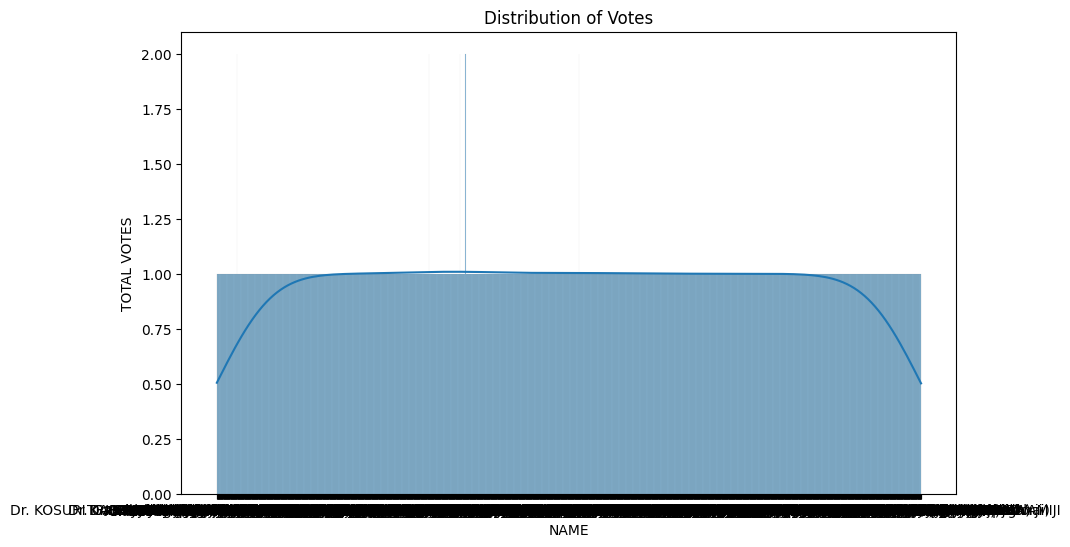

In [ ]:
# Histogram of a numeric variable
plt.figure(figsize=(10, 6))
sns.histplot(data['NAME'], bins=20, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('NAME')
plt.ylabel('TOTAL VOTES')
plt.show()

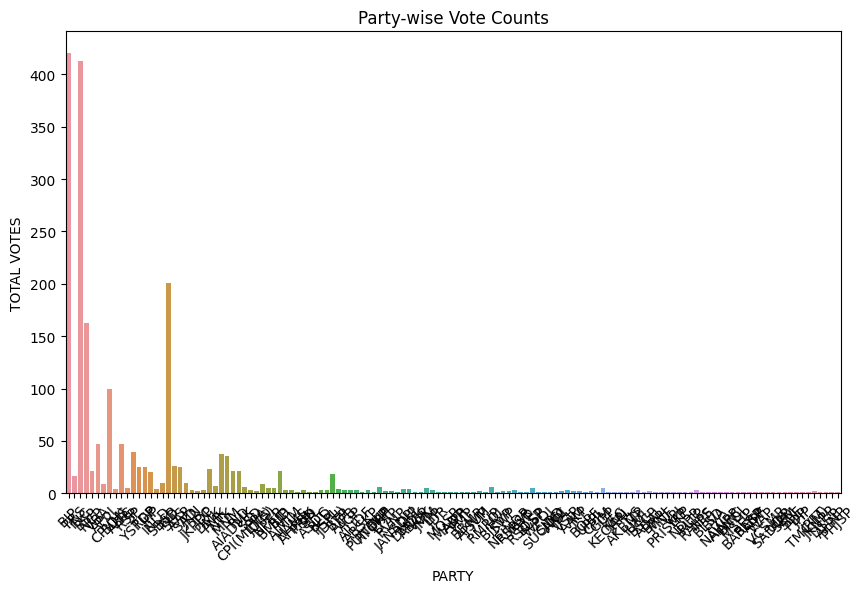

In [ ]:
# Count plot of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='PARTY', data=data)
plt.title('Party-wise Vote Counts')
plt.xticks(rotation=45)
plt.xlabel('PARTY')
plt.ylabel('TOTAL VOTES')
plt.show()


<ipython-input-15-cc94773b3ac5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


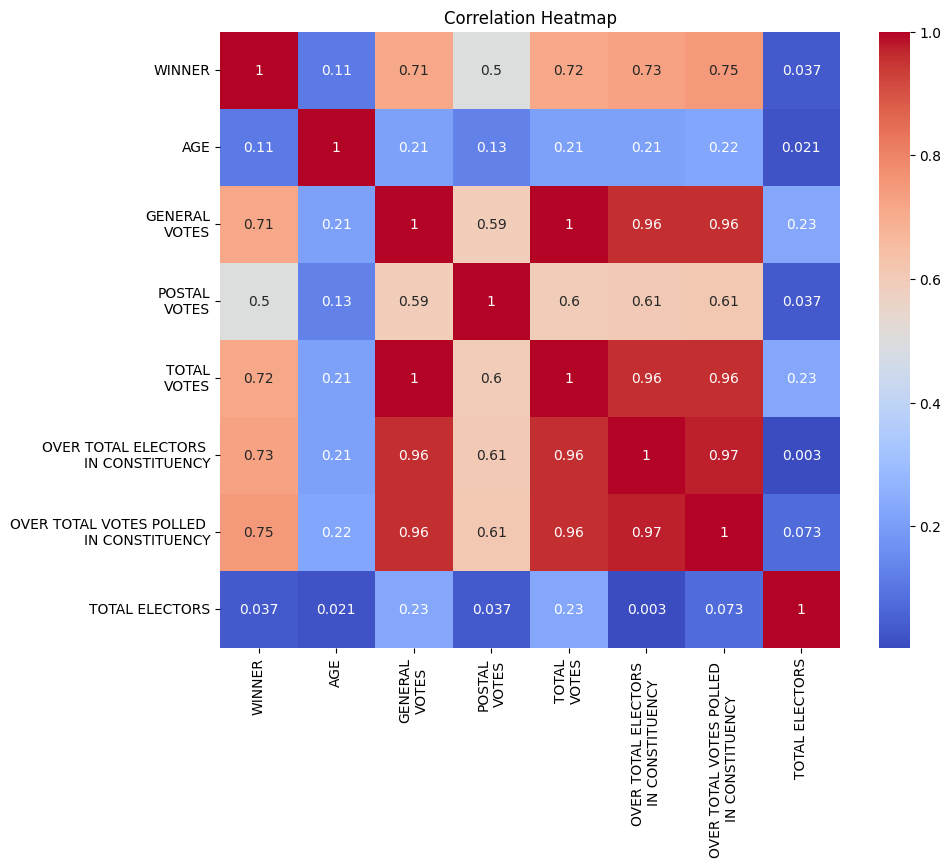

In [ ]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

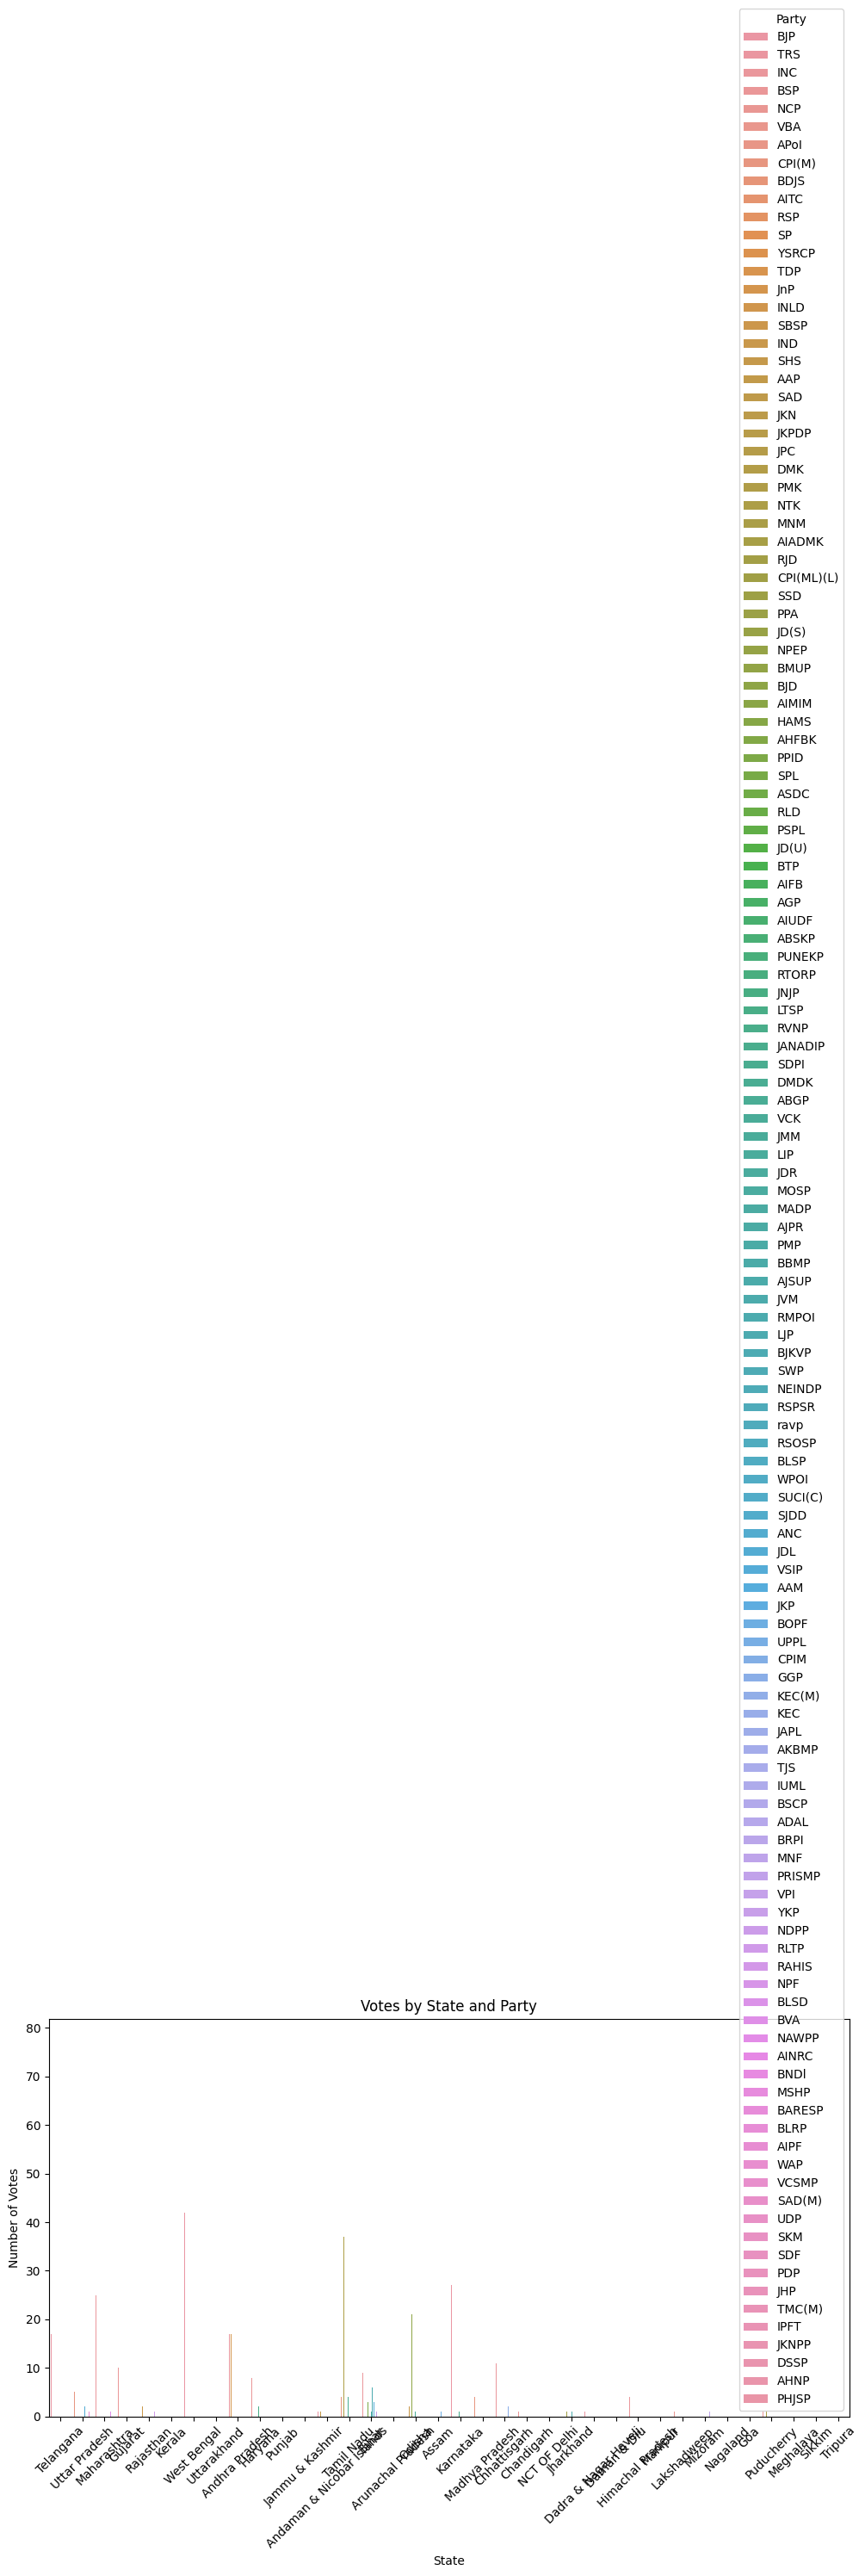

In [ ]:
# Countplot of votes by state
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='STATE', hue='PARTY')
plt.title('Votes by State and Party')
plt.xlabel('State')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.show()

In [ ]:
c1=0
c2=0
c3=0
for i in data['AGE']:
  if i>=60 :
    c1=c1 + 1
  elif i>30:
    c2=c2+1
  elif i>0:
    c3=c3+1
print("Age greater than 60:", c1)
print("Age between 30 and 60:", c2)
print("Age less than 30:", c3)



Age greater than 60: 606
Age between 30 and 60: 1344
Age less than 30: 68


In [ ]:
df=data.groupby(['PARTY'])['WINNER'].sum()
df1=df.sort_values( ascending=False).head(10)
print(df1)

PARTY
BJP      300
INC       52
DMK       23
AITC      22
YSRCP     22
SHS       18
JD(U)     16
BSP       11
BJD       11
TRS        9
Name: WINNER, dtype: int64


In [ ]:
df2=pd.DataFrame({'PARTY':df1.index, 'SEATS':df1.values})
print(df2)

   PARTY  SEATS
0    BJP    300
1    INC     52
2    DMK     23
3   AITC     22
4  YSRCP     22
5    SHS     18
6  JD(U)     16
7    BSP     11
8    BJD     11
9    TRS      9


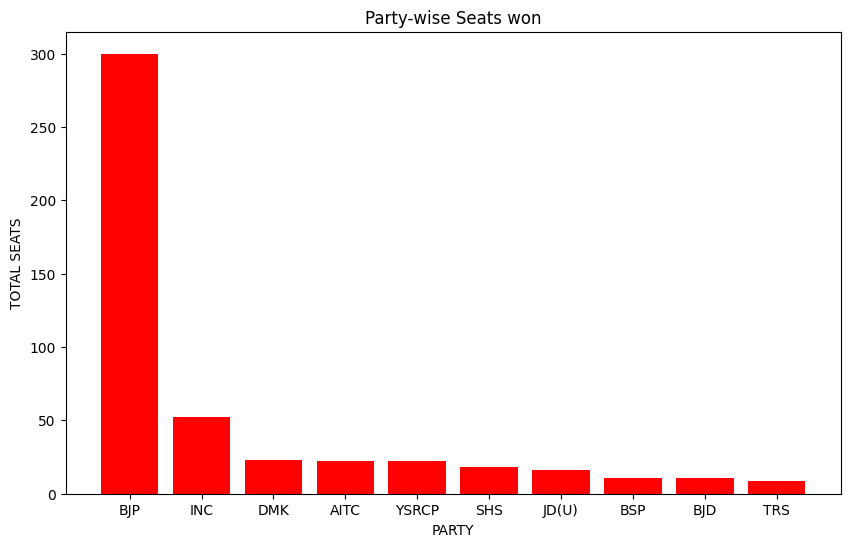

In [ ]:
# Count plot of a categorical variable
plt.figure(figsize=(10, 6))
#sns.countplot(x='PARTY', data=df2)
plt.bar(df2['PARTY'], df2['SEATS'], color='r')
plt.title('Party-wise Seats won')
plt.xlabel('PARTY')
plt.ylabel('TOTAL SEATS')
plt.show()

In [ ]:
edu=data.groupby(['PARTY','EDUCATION'])['NAME'].count()
#edu1=edu.sort_values(ascending=False)
print(edu)

PARTY  EDUCATION            
AAM    8th Pass                  1
       Literate                  1
AAP    10th Pass                 1
       12th Pass                 5
       8th Pass                  1
                                ..
YSRCP  Doctorate                 1
       Graduate                  5
       Graduate Professional     6
       Post Graduate            10
ravp   Doctorate                 1
Name: NAME, Length: 372, dtype: int64


In [ ]:
cat=data.groupby(['PARTY','CATEGORY'])['NAME'].count()
#cat1=cat.sort_values(ascending=False)
print(cat)

PARTY  CATEGORY
AAM    GENERAL      1
       SC           1
AAP    GENERAL     20
       SC           5
ABGP   ST           1
                   ..
YKP    GENERAL      1
YSRCP  GENERAL     20
       SC           4
       ST           1
ravp   GENERAL      1
Name: NAME, Length: 198, dtype: int64


In [ ]:
gen=data.groupby(['PARTY','GENDER'])['NAME'].count()
#gen1=gen.sort_values(ascending=False)
print(gen)

PARTY  GENDER
AAM    FEMALE     1
       MALE       1
AAP    FEMALE     3
       MALE      22
ABGP   MALE       1
                 ..
WPOI   MALE       1
YKP    MALE       1
YSRCP  FEMALE     4
       MALE      21
ravp   MALE       1
Name: NAME, Length: 171, dtype: int64
